# PCA and Dimension Reduction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('pca-dataset.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,0.922486,1.047879,-2.963721,-0.056906,1.265347,3.858544,0.491978,-0.490947,-4.320868,0.593099,...,0.536582,-0.725250,1.331478,1.185142,-2.963721,1.314720,2.487634,-0.424585,0.995500,1.0
1,1.210683,-2.384247,2.590403,-2.600047,-1.039447,-0.687409,0.847554,-0.563711,-4.944035,0.357768,...,-1.811372,-1.981515,0.212563,1.569957,2.590403,2.475946,0.866024,1.414244,0.337811,0.0
2,0.428323,-4.476885,8.180427,-4.260930,-1.435362,-6.440634,4.620321,-1.400001,-7.511350,1.946596,...,-2.506842,0.704681,-2.628639,3.458000,8.180427,3.718988,0.771003,-1.153540,-0.148205,0.0
3,-0.631406,0.255251,-4.260573,1.140672,-0.738570,5.966119,-5.335446,-0.729138,5.655376,-0.852272,...,-0.733406,1.295768,-1.049316,3.925402,-4.260573,-4.457084,-2.563916,-1.388560,0.179481,2.0
4,-1.217200,-3.333409,4.420645,1.231249,-0.081330,-2.874278,1.404699,0.680510,4.243968,2.281619,...,2.104220,1.120948,-1.349871,-1.680847,4.420645,-3.035590,-1.190401,-0.421525,-0.883157,0.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [3]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std  = sc.transform(X_test)

In [5]:
# insert code here

import numpy as np

cov_mat = np.cov(X_train_std.T)
print(cov_mat.round(1))

[[ 1.   0.  -0.   0.  -0.   0.  -0.   0.  -0.  -0.   0.   0.  -0.   0.
  -0.  -0.   0.   0.  -0.   0. ]
 [ 0.   1.  -0.6  0.4  0.   0.1 -0.   0.   0.3 -0.   0.   0.  -0.   0.2
  -0.2 -0.6 -0.1 -0.2 -0.  -0. ]
 [-0.  -0.6  1.  -0.1 -0.  -0.7  0.4 -0.  -0.1  0.3 -0.5 -0.2  0.  -0.3
  -0.3  1.   0.5 -0.   0.  -0. ]
 [ 0.   0.4 -0.1  1.   0.  -0.1 -0.3  0.   0.6  0.3 -0.1  0.6  0.  -0.1
  -0.5 -0.1  0.  -0.2 -0.  -0. ]
 [-0.   0.  -0.   0.   1.   0.   0.   0.  -0.   0.  -0.   0.   0.   0.
  -0.  -0.   0.   0.   0.   0. ]
 [ 0.   0.1 -0.7 -0.1  0.   1.  -0.6  0.   0.  -0.2  0.5  0.2  0.   0.2
   0.4 -0.7 -0.6  0.4 -0.   0. ]
 [-0.  -0.   0.4 -0.3  0.  -0.6  1.  -0.  -0.4  0.4 -0.3 -0.1 -0.   0.2
  -0.3  0.4  0.2  0.   0.  -0. ]
 [ 0.   0.  -0.   0.   0.   0.  -0.   1.   0.  -0.   0.   0.   0.  -0.
   0.  -0.  -0.   0.   0.  -0. ]
 [-0.   0.3 -0.1  0.6 -0.   0.  -0.4  0.   1.  -0.  -0.5  0.5 -0.  -0.3
  -0.3 -0.1 -0.5 -0.3 -0.  -0. ]
 [-0.  -0.   0.3  0.3  0.  -0.2  0.4 -0.  -0.   1.  -0.1 -

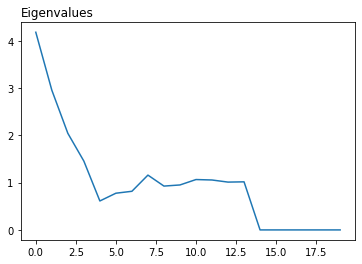

In [6]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

eigen_val_list=[]
# converting complex number to float
for x1 in eigen_vals:
    a=x1.real
    b=x1.imag
    val=a+b
    eigen_val_list.append(val)

plt.plot(eigen_val_list)
plt.title('Eigenvalues', loc='left')
plt.show()

In [7]:
eigen_vals

array([ 4.17836097e+00+0.00000000e+00j,  2.95439134e+00+0.00000000e+00j,
        2.04205464e+00+0.00000000e+00j,  1.45484429e+00+0.00000000e+00j,
        6.11992043e-01+0.00000000e+00j,  7.75781426e-01+0.00000000e+00j,
        8.16564332e-01+0.00000000e+00j,  1.15859769e+00+0.00000000e+00j,
        9.26544726e-01+0.00000000e+00j,  9.50386076e-01+0.00000000e+00j,
        1.06477881e+00+0.00000000e+00j,  1.05528304e+00+0.00000000e+00j,
        1.01068550e+00+0.00000000e+00j,  1.01641568e+00+0.00000000e+00j,
       -3.80539368e-16+0.00000000e+00j, -7.38557795e-16+0.00000000e+00j,
        7.31935274e-17+1.94975402e-16j,  7.31935274e-17-1.94975402e-16j,
        1.29211983e-16+0.00000000e+00j,  9.96159843e-17+0.00000000e+00j])

In [8]:
eigen_val_list

[4.178360968434636,
 2.9543913438786022,
 2.0420546384842697,
 1.4548442919832978,
 0.6119920426067568,
 0.7757814258866357,
 0.8165643322457203,
 1.158597693790651,
 0.9265447256004181,
 0.9503860761571741,
 1.0647788104886844,
 1.0552830397325177,
 1.010685496744035,
 1.0164156811058866,
 -3.805393682734431e-16,
 -7.3855779451602e-16,
 2.6816892967679503e-16,
 -1.2178187482787527e-16,
 1.292119830518639e-16,
 9.961598427392787e-17]

In [9]:
tot = sum(eigen_val_list)

var_exp = [(i / tot) for i in sorted(eigen_val_list, reverse=True)]
cum_var_exp = np.cumsum(var_exp)



In [10]:
var_exp

[0.20874395004804697,
 0.1475964675546018,
 0.10201764631427661,
 0.0726815960869989,
 0.05788160978562459,
 0.05319457474066384,
 0.05272018185997034,
 0.0507784334019149,
 0.05049216294150407,
 0.04747970438801881,
 0.04628863024978754,
 0.040794193098442434,
 0.03875674706825316,
 0.03057410246189588,
 1.3397272778436548e-17,
 6.455215319966031e-18,
 4.976648547684978e-18,
 -6.084019496609267e-18,
 -1.9011112606660755e-17,
 -3.689711648436282e-17]

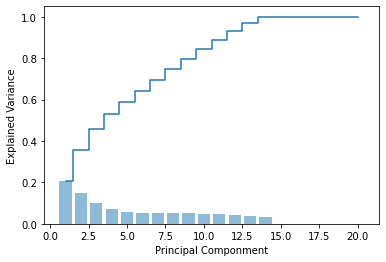

In [11]:
plt.bar(range(1,21), var_exp, alpha=0.5, align='center', label='Variance Explained')
plt.step(range(1,21), cum_var_exp, where='mid', label='Cumulative Explained')
plt.xlabel('Principal Componment')
plt.ylabel('Explained Variance')
plt.show()

> Above diagram shows that the first, second and third component explains 20%, almost 40% and 50% of variance in the data respectively. So we will set k=3 which covers 100% of variance in the data.

<Insert comments>

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

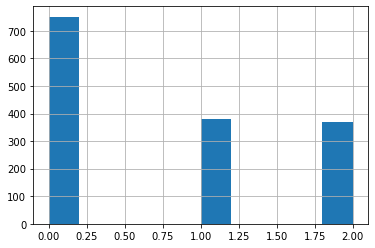

In [12]:
# Insert code here
df['target'].hist()
plt.show()

> Graph shows that two class are closely balanced where as one class is unbalance form other two classes. If we want to target a particular class we can use precision or recall but in this case how good the model performed for all the classes can be measured by accuracy. So I would use accuracy as a evaluation metric.

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [13]:
# Insert code here
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

p = Pipeline([('scaling', StandardScaler()), 
              ('model', LogisticRegression())
             ])

m=p.fit(X_train, y_training)
y_hat = m.predict(X_test)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.73      0.78      0.76       149
         1.0       0.63      0.52      0.57        73
         2.0       0.66      0.69      0.68        78

    accuracy                           0.69       300
   macro avg       0.68      0.66      0.67       300
weighted avg       0.69      0.69      0.69       300



> Without using PCA if we use Logistic Regression on the data models accuracy is 0.69 . Precision recall and f1-score for class 0 is slightly better than other two classes may be thats because frequency of class 0 was higher than the class 1 or 2. 

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [15]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [16]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
              eigen_pairs[1][1][:, np.newaxis],
              eigen_pairs[2][1][:, np.newaxis]))

print(w)

[[-0.01677058+0.j -0.01267786+0.j  0.0310216 +0.j]
 [-0.19628185+0.j -0.24321901+0.j  0.32798283+0.j]
 [ 0.46123271+0.j  0.03700118+0.j -0.19846444+0.j]
 [-0.02419795+0.j -0.5028792 +0.j  0.00170003+0.j]
 [-0.00527296+0.j -0.01413383+0.j  0.04973853+0.j]
 [-0.42803917+0.j  0.10776123+0.j  0.0009145 +0.j]
 [ 0.30160969+0.j  0.07738335+0.j  0.28739999+0.j]
 [-0.03106399+0.j -0.01329519+0.j -0.03667353+0.j]
 [-0.09738057+0.j -0.48803427+0.j -0.28651344+0.j]
 [ 0.18784189+0.j -0.12966948+0.j  0.27941678+0.j]
 [-0.25837301+0.j  0.29587934+0.j  0.0727379 +0.j]
 [-0.11095074+0.j -0.36746878+0.j -0.10401917+0.j]
 [-0.00241432+0.j  0.00925076+0.j -0.04102652+0.j]
 [-0.05547299+0.j  0.00795778+0.j  0.6137239 +0.j]
 [-0.22061698+0.j  0.38009867+0.j -0.35344963+0.j]
 [ 0.46123271+0.j  0.03700118+0.j -0.19846444+0.j]
 [ 0.28546562+0.j  0.11360529+0.j  0.17325973+0.j]
 [-0.04308116+0.j  0.17269017+0.j  0.12553684+0.j]
 [ 0.03085244+0.j  0.00853699+0.j -0.01859872+0.j]
 [-0.00831018+0.j  0.04567905+0

In [19]:
# ignoring the warnings 
import warnings
warnings.filterwarnings("ignore")

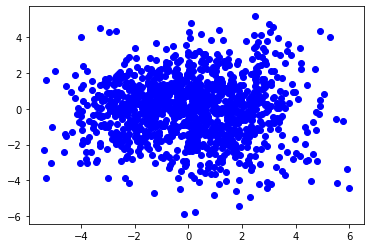

In [20]:
X_train_pca = X_train_std.dot(w)

plt.plot(X_train_pca[:,0], X_train_pca[:,1], 'bo')
plt.show()

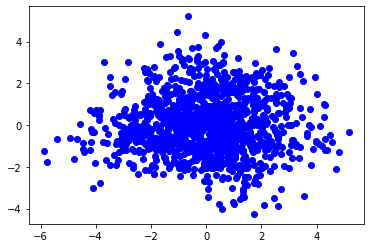

In [21]:
X_train_pca = X_train_std.dot(w)

plt.plot(X_train_pca[:,1], X_train_pca[:,2], 'bo')
plt.show()

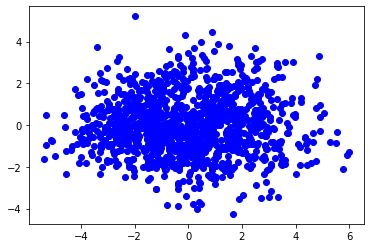

In [22]:
X_train_pca = X_train_std.dot(w)

plt.plot(X_train_pca[:,0], X_train_pca[:,2], 'bo')
plt.show()

In [23]:
# Insert code
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

p = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA()),
              ('model', LogisticRegression())
             ])

params = {'model__C': [0.01, 0.1, 1, 10], 'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

grid_search = GridSearchCV(p, param_grid=params, scoring= 'accuracy', cv=10, refit=True)
grid_search = grid_search.fit(X_train, y_training)
grid_search.best_estimator_


Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=7)),
                ('model', LogisticRegression(C=0.1))])

In [24]:
y_hat = grid_search.predict(X_test)

In [25]:
gcv_results = GridSearchCV(estimator=p, 
                           param_grid=params, refit=True)
gcv_results = gcv_results.fit(X_train, y_training)

y_testp = gcv_results.predict(X_test)
y_testp_dt = gcv_results.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70       149
         1.0       0.64      0.56      0.60        73
         2.0       0.57      0.60      0.59        78

    accuracy                           0.65       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.65      0.65      0.65       300



> In this model we have used PCA with Logistic Regression the results are not better than the Logistic Regression model without PCA. There is difference of 0.04 in accuracy. In PCA with multiple components the model performed best with component value 7. 

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [26]:
# Insert code here
from sklearn.tree import DecisionTreeClassifier

p = Pipeline([('scaling', StandardScaler()), 
              ('dt', DecisionTreeClassifier())
             ])

m=p.fit(X_train, y_training)
y_hat = m.predict(X_test)


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.78      0.74      0.76       149
         1.0       0.71      0.67      0.69        73
         2.0       0.69      0.79      0.74        78

    accuracy                           0.74       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.74      0.74      0.74       300



> So far Decision tree classifier without PCA has a better accuracy than other models disscussed above with accuracy of 0.74. Also the precision and recall values are higher for this model.

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [28]:
# Insert code here
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

p = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA()),
              ('dt', DecisionTreeClassifier())
             ])

params = { 'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

grid_search = GridSearchCV(p, param_grid=params, scoring= 'accuracy', cv=10, refit=True)
grid_search = grid_search.fit(X_train, y_training)
grid_search.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=6)),
                ('dt', DecisionTreeClassifier())])

In [30]:
y_hat = grid_search.predict(X_test)

In [31]:
gcv_results = GridSearchCV(estimator=p, 
                           param_grid=params, refit=True)
gcv_results = gcv_results.fit(X_train, y_training)

y_testp = gcv_results.predict(X_test)
y_testp_dt = gcv_results.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

         0.0       0.71      0.67      0.69       149
         1.0       0.53      0.58      0.55        73
         2.0       0.62      0.64      0.63        78

    accuracy                           0.64       300
   macro avg       0.62      0.63      0.63       300
weighted avg       0.64      0.64      0.64       300



> For decision tree classifier models performance is best with component value 6. This model has accuracy of 0.64 however the accuracy of the Decision tree without PCA is still better. Even the logistic regression with and without PCA also has slightly better accuracy than the decision tree with PCA model. Overall Decision tree classifier without PCA has better performance amongst all.